In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime


In [2]:
df1 = pd.DataFrame( pd.read_csv("meteo-vid-2018.csv", engine="python" ))
df1.head()

,Date,Time,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,H. suelo 60,Result2_Avg,T. suelo 60 cm,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego
0,06/01/2018,17:00:00,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,...,0.23,0.04,24.33,75.80,0.04,14.16,13.37,14.46,13.46,0.0
1,06/01/2018,17:30:00,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,...,0.23,0.04,21.95,71.54,0.04,14.10,13.23,14.32,13.81,0.0
2,06/01/2018,18:00:00,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,...,0.23,0.04,21.34,70.38,0.04,14.31,13.12,14.51,13.84,0.0
3,06/01/2018,18:30:00,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,...,0.23,0.04,21.12,70.02,0.04,14.38,13.18,14.58,13.94,0.0
4,06/01/2018,19:00:00,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,...,0.24,0.04,21.10,70.00,0.04,14.41,13.32,14.60,14.11,0.0


In [3]:
df1["FECHAN"] = df1["Date"] +" "+ df1["Time"]
df1['FECHAS'] = pd.to_datetime(df1['FECHAN'], dayfirst=True)
df1["albedo_Avg"] = pd.to_numeric(df1.albedo_Avg, errors='coerce')

In [4]:
df1.dtypes

Date                        object
Time                        object
batt_volt_Min              float64
logger_temp                float64
short_up_Avg               float64
short_dn_Avg               float64
long_up_Avg                float64
long_dn_Avg                float64
cnr4_T_C_Avg               float64
cnr4_T_K_Avg               float64
long_up_corr_Avg           float64
long_dn_corr_Avg           float64
Rs_net_Avg                 float64
Rl_net_Avg                 float64
albedo_Avg                 float64
Rn_Avg                     float64
AirTC_Avg                  float64
RH                         float64
WS_ms_S_WVT                float64
WindDir_D1_WVT             float64
WindDir_SD1_WVT            float64
Temp_C_Avg(1)              float64
Temp_C_Avg(2)              float64
Temp_C_Avg(3)              float64
Temp_C_Avg(4)               object
H. suelo 60                float64
Result2_Avg                float64
T. suelo 60 cm             float64
Result4_Avg         

In [5]:
df1.head(48)

,Date,Time,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,T. suelo 60 cm,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego,FECHAN,FECHAS
0,06/01/2018,17:00:00,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,...,24.33,75.80,0.04,14.16,13.37,14.46,13.46,0.0,06/01/2018 17:00:00,2018-01-06 17:00:00
1,06/01/2018,17:30:00,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,...,21.95,71.54,0.04,14.10,13.23,14.32,13.81,0.0,06/01/2018 17:30:00,2018-01-06 17:30:00
2,06/01/2018,18:00:00,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,...,21.34,70.38,0.04,14.31,13.12,14.51,13.84,0.0,06/01/2018 18:00:00,2018-01-06 18:00:00
3,06/01/2018,18:30:00,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,...,21.12,70.02,0.04,14.38,13.18,14.58,13.94,0.0,06/01/2018 18:30:00,2018-01-06 18:30:00
4,06/01/2018,19:00:00,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,...,21.10,70.00,0.04,14.41,13.32,14.60,14.11,0.0,06/01/2018 19:00:00,2018-01-06 19:00:00
5,06/01/2018,19:30:00,12.14,22.80,-2.13,-0.43,-47.28,-13.79,21.37,294.52,...,21.10,70.00,0.04,14.63,13.50,14.83,14.30,0.0,06/01/2018 19:30:00,2018-01-06 19:30:00
6,06/01/2018,20:00:00,12.11,21.60,-2.21,-0.44,-46.72,-12.81,20.30,293.45,...,21.08,69.95,0.04,14.72,13.82,14.92,14.65,0.0,06/01/2018 20:00:00,2018-01-06 20:00:00
7,06/01/2018,20:30:00,12.09,20.31,-2.12,-0.42,-50.98,-11.53,18.94,292.09,...,21.00,69.80,0.04,14.94,13.93,15.14,14.77,0.0,06/01/2018 20:30:00,2018-01-06 20:30:00
8,06/01/2018,21:00:00,12.06,19.05,-2.59,-0.52,-55.46,-12.60,18.00,291.15,...,20.92,69.64,0.04,14.98,14.04,15.18,14.89,0.0,06/01/2018 21:00:00,2018-01-06 21:00:00
9,06/01/2018,21:30:00,12.03,18.07,-2.67,-0.53,-57.13,-13.04,17.31,290.46,...,20.91,69.61,0.04,14.87,14.14,15.06,14.98,0.0,06/01/2018 21:30:00,2018-01-06 21:30:00


In [6]:
df1 = df1.filter(['Date','FECHAS','WS_ms_S_WVT','AirTC_Avg','RH','Rn_Avg','albedo_Avg'],axis=1)
df1["MINUTO"]=df1["FECHAS"].dt.minute
df1["HORA"]=df1["FECHAS"].dt.month
df1["DIA"]=df1["FECHAS"].dt.day
df1["MES"]=df1["FECHAS"].dt.month
df1["AÑO"]=df1["FECHAS"].dt.year

In [7]:
df1.head()

,Date,FECHAS,WS_ms_S_WVT,AirTC_Avg,RH,Rn_Avg,albedo_Avg,MINUTO,HORA,DIA,MES,AÑO
0,06/01/2018,2018-01-06 17:00:00,2.33,27.75,20.61,1.79,0.00,0.0,1.0,6.0,1.0,2018.0
1,06/01/2018,2018-01-06 17:30:00,3.12,26.57,25.25,-18.59,0.00,30.0,1.0,6.0,1.0,2018.0
2,06/01/2018,2018-01-06 18:00:00,2.54,25.01,26.45,-35.10,0.00,0.0,1.0,6.0,1.0,2018.0
3,06/01/2018,2018-01-06 18:30:00,2.01,23.65,29.22,-40.13,-0.16,30.0,1.0,6.0,1.0,2018.0
4,06/01/2018,2018-01-06 19:00:00,2.14,22.84,31.08,-39.46,-0.15,0.0,1.0,6.0,1.0,2018.0


In [8]:
Latitud=[]
Longitud=[]
Altitud=[]
for i in range(0,12):
    Latitud.append(28.9301)
    Longitud.append(111.3106)
    Altitud.append(101)
    
Meses=["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
len(Latitud)

12

In [9]:
Tabla = pd.DataFrame()
Tabla["MESES"]=Meses
Tabla["LATITUD"]=Latitud
Tabla["Longitud"]=Longitud
Tabla["Altitud"]=Altitud

Tabla_d = pd.DataFrame()
Tabla_d['FECHA'] = pd.to_datetime(df1["Date"], dayfirst=True)
Tabla_d= Tabla_d.drop_duplicates(subset=['FECHA'])
Tabla_d=Tabla_d.drop(17247)



In [10]:
V_v_d = df1.groupby(df1["MES"])['WS_ms_S_WVT'].agg({"mean"})
V_v_d = V_v_d["mean"].tolist()
Tabla["Velocidad_del_Viento "]=V_v_d

In [11]:
A_v_D_MAX= df1.groupby([df1["MES"],df1["DIA"]])['AirTC_Avg'].agg({"max"})
A_v_D_MAX = A_v_D_MAX["max"].tolist()
Tabla_d["A_v_D_MAX"]=A_v_D_MAX
A_v_D_MIN= df1.groupby([df1["MES"],df1["DIA"]])['AirTC_Avg'].agg({"min"})
A_v_D_MIN = A_v_D_MIN["min"].tolist()
Tabla_d["A_v_D_MIN"]=A_v_D_MIN
A_v_MAX = Tabla_d.groupby(Tabla_d["FECHA"].dt.month)['A_v_D_MAX'].agg({"mean"})
A_v_MAX = A_v_MAX["mean"].tolist()
Tabla["T_MAX"]=A_v_MAX
A_v_MIN= Tabla_d.groupby(Tabla_d["FECHA"].dt.month)['A_v_D_MIN'].agg({"mean"})
A_v_MIN = A_v_MIN["mean"].tolist()
Tabla["T_MIN"]=A_v_MIN

In [12]:
Albedo= df1.groupby(df1["MES"])['albedo_Avg'].agg({"mean"})
Albedo= Albedo["mean"].tolist()
Tabla["Albedo"]=Albedo

In [13]:
RH_D_MAX= df1.groupby([df1["MES"],df1["DIA"]])['RH'].agg({"max"})
RH_D_MAX = RH_D_MAX["max"].tolist()
Tabla_d["RH_D_MAX"]=RH_D_MAX
RH_D_MIN= df1.groupby([df1["MES"],df1["DIA"]])['RH'].agg({"min"})
RH_D_MIN = RH_D_MIN["min"].tolist()
Tabla_d["RH_D_MIN"]=RH_D_MIN
RH_MAX = Tabla_d.groupby(Tabla_d["FECHA"].dt.month)['RH_D_MAX'].agg({"mean"})
RH_MAX = RH_MAX["mean"].tolist()
Tabla["RH_MAX"]=RH_MAX
RH_MIN= Tabla_d.groupby(Tabla_d["FECHA"].dt.month)['RH_D_MIN'].agg({"mean"})
RH_MIN = RH_MIN["mean"].tolist()
Tabla["RH_MIN"]=RH_MIN

In [14]:
T_MEAN= df1.groupby(df1["MES"])['AirTC_Avg'].agg({"mean"})
T_MEAN= T_MEAN["mean"].tolist()
Tabla["T_MEAN"]=T_MEAN


In [15]:
RH = df1.groupby(df1["FECHAS"].dt.month)['RH'].agg({"mean"})
RH = RH["mean"].tolist()
Tabla["RH_MEAN"]=RH

In [16]:
RS = df1.groupby(df1["FECHAS"].dt.month)['Rn_Avg'].agg({"mean"})
RS = RS["mean"].tolist()
Tabla["RS"]=RS

In [54]:
Tabla

,MESES,LATITUD,Longitud,Altitud,Velocidad_del_Viento,T_MAX,T_MIN,Albedo,RH_MAX,RH_MIN,T_MEAN,RH_MEAN,RS,ETO_7,ETO_31,ET0_34
0,Enero,28.9301,111.3106,101,1.943827,26.221111,7.414444,-0.423822,66.464444,16.905185,16.963975,38.471432,34.734815,17.558177,7.059833,7.229301
1,Febrero,28.9301,111.3106,101,1.964189,25.729286,9.371786,-0.479545,71.871071,25.134286,17.230275,48.168006,56.250350,28.811594,10.981585,6.225899
2,Marzo,28.9301,111.3106,101,1.926196,29.016774,8.894194,-0.409137,68.393548,15.673871,19.282359,36.968353,92.894913,52.384876,18.933471,5.988913
3,Abril,28.9301,111.3106,101,2.101812,32.885333,10.739333,-0.386088,75.936333,15.176333,21.880618,40.785667,134.012965,84.346631,28.555923,12.721210
4,Mayo,28.9301,111.3106,101,2.113918,33.824839,12.665161,-0.367835,80.264516,17.644839,23.650034,44.233468,162.405343,109.458090,35.575228,22.018419
5,Junio,28.9301,111.3106,101,2.154986,36.999000,19.406000,-0.381934,81.303333,25.474333,28.416187,50.810507,163.926069,130.171712,38.504307,34.816797
6,Julio,28.9301,111.3106,101,2.022204,38.370000,24.272581,-0.189610,85.229677,32.464839,31.065726,57.639805,157.534402,135.614481,38.202712,29.379138
7,Agosto,28.9301,111.3106,101,1.910853,36.980000,24.718387,-0.381667,92.190000,42.103871,30.120894,68.868454,151.273589,126.623032,36.055183,36.723789
8,Septiembre,28.9301,111.3106,101,1.790326,37.689667,23.631333,-0.486379,93.101333,36.543000,29.661271,66.619750,136.749910,112.882131,32.472029,36.355425
9,Octubre,28.9301,111.3106,101,1.664435,31.540645,17.023548,-0.614787,94.716774,37.823871,23.254207,68.696082,95.513468,63.421517,20.571038,26.914278


In [17]:
Tabla["ETO_7"]= (0.0252*Tabla["T_MEAN"] + 0.078) * Tabla["RS"] 

In [18]:
Tabla["ETO_31"]= 0.0393*Tabla["RS"]*(Tabla["T_MEAN"] +9.5 )**0.5 - 0.19*(Tabla["RS"]**0.6)*((Tabla["LATITUD"]* math.pi/180)**0.6) + 0.0061*(Tabla["T_MEAN"]+20)*(1.12*Tabla["T_MEAN"]-Tabla["T_MIN"]-2)**0.7   

In [19]:
dr = []
δ = []
ω = []
φ = (math.pi/180)*28.94917
for m in range (0,len(Tabla)):
    α = Tabla['Albedo'][i]
    j = int(30.4*m - 15)
    dr.append(1 + 0.033*math.cos(((2*math.pi)/365)*j))
    δ.append(0.409*math.sin(((2*math.pi)/365)*j - 1.39))
    ω.append(math.acos(-math.tan(φ)*math.tan(0.409*math.sin(((2*math.pi)/365)*j - 1.39))))

In [20]:
df_aux = pd.DataFrame()
df_aux['dr'] = dr
df_aux['δ'] = δ
df_aux['ω'] = ω
df_aux = df_aux.apply(pd.to_numeric, errors='coerce')
Ra = []
for i in range (0,len(Tabla)):
    Ra.append(((24*60)/math.pi)*0.0820*(df_aux['ω'][i]*math.sin(φ)*math.sin(df_aux['δ'][i]) + math.cos(φ)*math.cos(df_aux['δ'][i])*math.sin(df_aux['ω'][i])))   
df_aux['Ra'] = Ra
df_aux['Ra'] = df_aux['Ra'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
df_aux

,dr,δ,ω,Ra
0,1.031906,-0.407775,1.329507,19.726184
1,1.031906,-0.370216,1.354428,21.030913
2,1.023584,-0.236097,1.437322,25.576301
3,1.008564,-0.033386,1.552321,31.923000
4,0.991711,0.172248,1.667178,37.451166
5,0.976615,0.336995,1.765832,41.073612
6,0.968168,0.407488,1.811891,42.386825
7,0.968023,0.371698,1.788131,41.738100
8,0.976615,0.233213,1.702570,38.880258
9,0.991162,0.036894,1.591215,33.928190


In [21]:
Tabla["ET0_34"] = (0.051*(1 -Tabla["Albedo"])*Tabla["RS"]*(Tabla["T_MEAN"] + 9.5)**0.5 - 2.4*(Tabla["RS"]/df_aux['Ra'])**2 + 0.048*(Tabla["T_MEAN"] + 20)*(1 - Tabla["RH_MEAN"]/100)*(0.5 + 0.536*Tabla["Velocidad_del_Viento "]) + 0.00012*101)

In [22]:
Tabla

,MESES,LATITUD,Longitud,Altitud,Velocidad_del_Viento,T_MAX,T_MIN,Albedo,RH_MAX,RH_MIN,T_MEAN,RH_MEAN,RS,ETO_7,ETO_31,ET0_34
0,Enero,28.9301,111.3106,101,1.943827,26.221111,7.414444,-0.423822,66.464444,16.905185,16.963975,38.471432,34.734815,17.558177,7.059833,7.229301
1,Febrero,28.9301,111.3106,101,1.964189,25.729286,9.371786,-0.479545,71.871071,25.134286,17.230275,48.168006,56.250350,28.811594,10.981585,6.225899
2,Marzo,28.9301,111.3106,101,1.926196,29.016774,8.894194,-0.409137,68.393548,15.673871,19.282359,36.968353,92.894913,52.384876,18.933471,5.988913
3,Abril,28.9301,111.3106,101,2.101812,32.885333,10.739333,-0.386088,75.936333,15.176333,21.880618,40.785667,134.012965,84.346631,28.555923,12.721210
4,Mayo,28.9301,111.3106,101,2.113918,33.824839,12.665161,-0.367835,80.264516,17.644839,23.650034,44.233468,162.405343,109.458090,35.575228,22.018419
5,Junio,28.9301,111.3106,101,2.154986,36.999000,19.406000,-0.381934,81.303333,25.474333,28.416187,50.810507,163.926069,130.171712,38.504307,34.816797
6,Julio,28.9301,111.3106,101,2.022204,38.370000,24.272581,-0.189610,85.229677,32.464839,31.065726,57.639805,157.534402,135.614481,38.202712,29.379138
7,Agosto,28.9301,111.3106,101,1.910853,36.980000,24.718387,-0.381667,92.190000,42.103871,30.120894,68.868454,151.273589,126.623032,36.055183,36.723789
8,Septiembre,28.9301,111.3106,101,1.790326,37.689667,23.631333,-0.486379,93.101333,36.543000,29.661271,66.619750,136.749910,112.882131,32.472029,36.355425
9,Octubre,28.9301,111.3106,101,1.664435,31.540645,17.023548,-0.614787,94.716774,37.823871,23.254207,68.696082,95.513468,63.421517,20.571038,26.914278


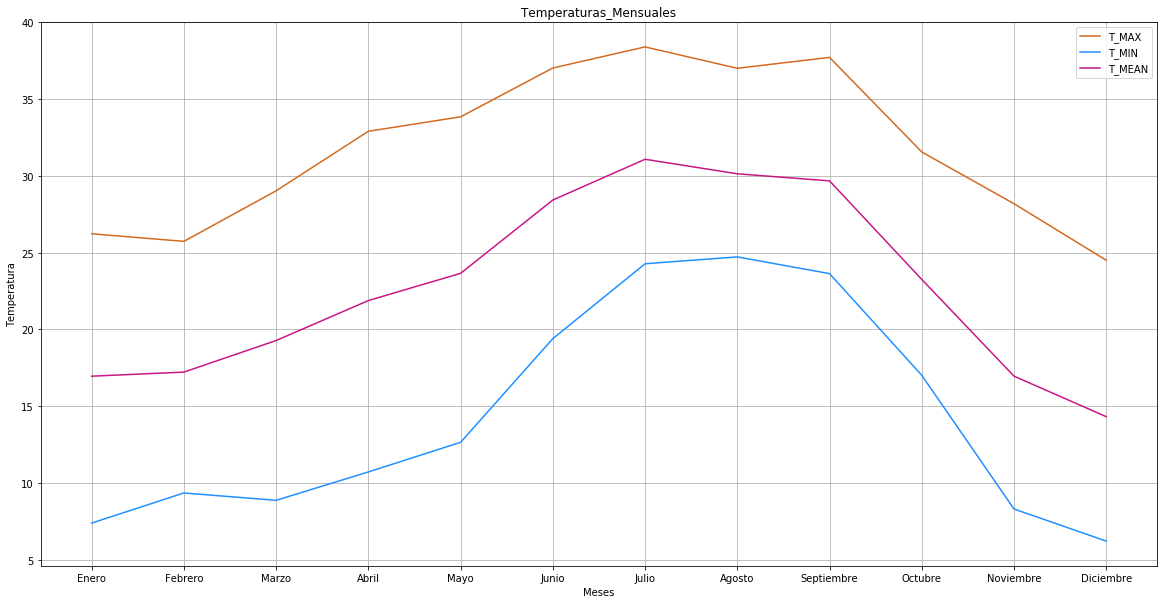

In [44]:
X = Meses
N = np.arange(24)           
Y1 = Tabla['T_MAX']       
Y2 = Tabla['T_MIN']       
Y3 = Tabla['T_MEAN']        

plt.figure(figsize=(20,10))
plt.plot(X, Y1, label="T_MAX", color = '#D2691E') 
plt.plot(Y2, label="T_MIN", color = '#1E90FF') 
plt.plot(Y3, label="T_MEAN", color = '#C71585')
plt.xlabel("Meses")                              
plt.ylabel("Temperatura") 
plt.legend()                                     
plt.grid()
plt.title('Temperaturas_Mensuales') 
plt.savefig('Temperaturas_Mensuales',plt=2000)     
plt.show()

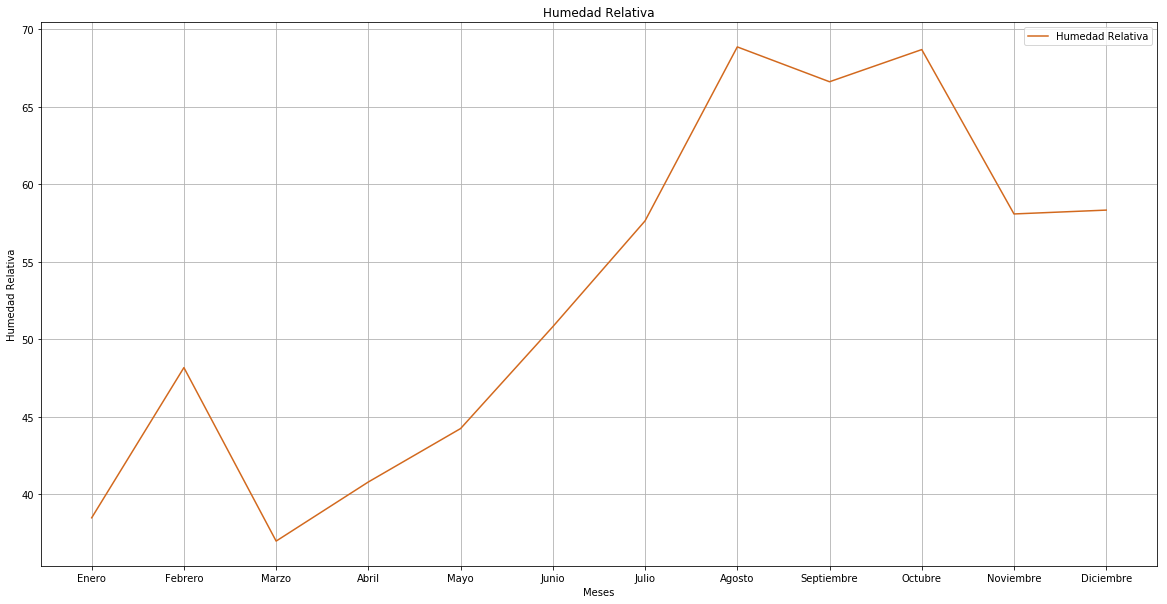

In [45]:
X = Meses
N = np.arange(24)           
Y1 = Tabla['RH_MEAN']       

plt.figure(figsize=(20,10))
plt.plot(X, Y1, label="Humedad Relativa", color = '#D2691E') 
plt.xlabel("Meses")                              
plt.ylabel("Humedad Relativa") 
plt.legend()                                     
plt.grid()
plt.title('Humedad Relativa') 
plt.savefig('Humedad_Relativa',plt=2000)     
plt.show()

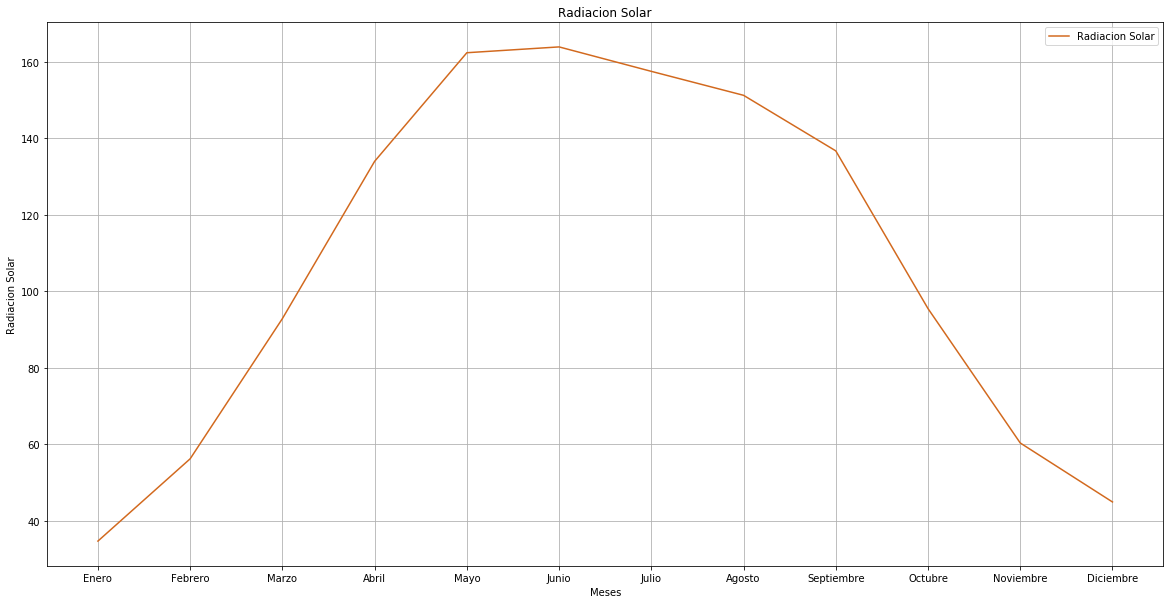

In [47]:
X = Meses
N = np.arange(24)           
Y1 = Tabla['RS']       

plt.figure(figsize=(20,10))
plt.plot(X, Y1, label="Radiacion Solar", color = '#D2691E') 
plt.xlabel("Meses")                              
plt.ylabel("Radiacion Solar") 
plt.legend()                                     
plt.grid()
plt.title('Radiacion Solar') 
plt.savefig('Radiacion_Solar',plt=2000)     
plt.show()

In [24]:
df2 = pd.DataFrame( pd.read_csv("flujos-vid-2018.csv", engine="python" ) )
df2.head()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,Tsoil_fmeth,Tsoil_fwin,PotRad,FP_NEEnight,FP_Temp,E_0,R_ref,Reco,GPP_f,GPP_fqc
0,--,--,--,umolm-2s-1,Wm-2,Wm-2,Wm-2,degC,degC,%,...,-,days,W_m-2,umolm-2s-1,degC,degK,umolm-2s-1,umolm-2s-1,umolm-2s-1,-
1,2018,7,0.5,2.56,11.52,-20.04,-0.87,16.51,20.99,43.83,...,-9999,-9999,0,-9999,16.51,207.66,0.92767,1.00713,-1.0729,1
2,2018,7,1,4.07,15.11,-7.34,-0.97,16.61,21.05,46.82,...,-9999,-9999,0,-9999,16.61,207.66,0.92767,1.01249,-9.62E-01,1
3,2018,7,1.5,0.92,8.61,-9.76,-0.96,16.07,21.09,46.65,...,-9999,-9999,0,-9999,16.07,207.66,0.92767,0.98371,-1.1643,1
4,2018,7,2,0.41,1.93,-8.55,-2.06,16.06,21.09,46.27,...,-9999,-9999,0,-9999,16.06,207.66,0.92767,0.98318,-1.1648,1


In [25]:
df2 = df2.drop(df2.index[0]).reset_index(drop=True)
df2 = df2.filter(['Year','DoY','Hour','Rg_f','LE_f','H_f'],axis=1)


In [26]:
print(len(df2))

17232


In [27]:
minute=[]
for i in range(1,17233):
    if (i%2 == 0):
        minute.append("00")
    else: 
        minute.append("30")
hour=[]
for i in range(0,359):
    for j in range(0,24):
        hour.append(str(j))
        hour.append(str(j))
        
hour.pop(0)
hour.append(str(0))

In [28]:
df2["MINUTE"]=minute
df2["HOUR"]=hour


In [29]:
df2["FECHAN"] = df2["Year"] +" "+ df2["DoY"] +" "+ df2["HOUR"]+" "+ df2["MINUTE"]
FECHA = []
for i in range(0,len(df2)):
    d=datetime.datetime.strptime(df2["FECHAN"][i],'%Y %j %H %M')
    F = d.isoformat(' ')
    FECHA.append(F)

df2["FECHAN"] = FECHA    

In [30]:
df2

,Year,DoY,Hour,Rg_f,LE_f,H_f,MINUTE,HOUR,FECHAN
0,2018,7,0.5,-0.87,11.52,-20.04,30,0,2018-01-07 00:30:00
1,2018,7,1,-0.97,15.11,-7.34,00,1,2018-01-07 01:00:00
2,2018,7,1.5,-0.96,8.61,-9.76,30,1,2018-01-07 01:30:00
3,2018,7,2,-2.06,1.93,-8.55,00,2,2018-01-07 02:00:00
4,2018,7,2.5,-1.32,6.40,-0.55,30,2,2018-01-07 02:30:00
5,2018,7,3,-1.22,2.44,-2.92,00,3,2018-01-07 03:00:00
6,2018,7,3.5,-1.14,2.40,-2.61,30,3,2018-01-07 03:30:00
7,2018,7,4,-1.74,2.49,-1.29,00,4,2018-01-07 04:00:00
8,2018,7,4.5,-1.24,5.80,-8.07,30,4,2018-01-07 04:30:00
9,2018,7,5,-1.31,2.39,3.08,00,5,2018-01-07 05:00:00


In [31]:
df2['FECHAS'] = pd.to_datetime(df2['FECHAN'], yearfirst=True)
df2 = df2.drop(['FECHAN','HOUR',"MINUTE","Year","DoY"], 1)
df2['Rg_f'] = df2['Rg_f'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
df2['LE_f'] = df2['LE_f'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
df2['H_f'] = df2['H_f'].apply(lambda col:pd.to_numeric(col, errors='coerce'))


In [48]:
df3=df2[df2['FECHAS'].dt.month==7]
df3=df3.reset_index(drop=True)
Tabla2= pd.DataFrame()
RG= df3.groupby([df3["FECHAS"].dt.hour])['Rg_f'].agg({"mean"})
RG= RG["mean"].tolist()
Tabla2["RG_F"]=RG

In [49]:
LE= df3.groupby([df3["FECHAS"].dt.hour])['LE_f'].agg({"mean"})
LE= LE["mean"].tolist()
Tabla2["LE_F"]=LE

In [50]:
H= df3.groupby([df3["FECHAS"].dt.hour])['H_f'].agg({"mean"})
H= H["mean"].tolist()
Tabla2["H_f"]=H

In [51]:
Dias=[]
for i in range(1,25):
    Dias.append(i-1)

In [52]:
Tabla2

,RG_F,LE_F,H_f
0,-1.042581,11.616129,-14.313065
1,-1.144516,8.202419,-11.780484
2,-1.109194,10.967581,-11.492903
3,-1.075000,6.779355,-9.075484
4,-1.000484,2.616290,-6.868226
5,-0.772581,7.011452,-7.552258
6,23.557097,16.157258,-7.328871
7,130.304677,68.318871,3.401774
8,282.204355,152.314194,22.781452
9,435.410161,230.029516,33.415968


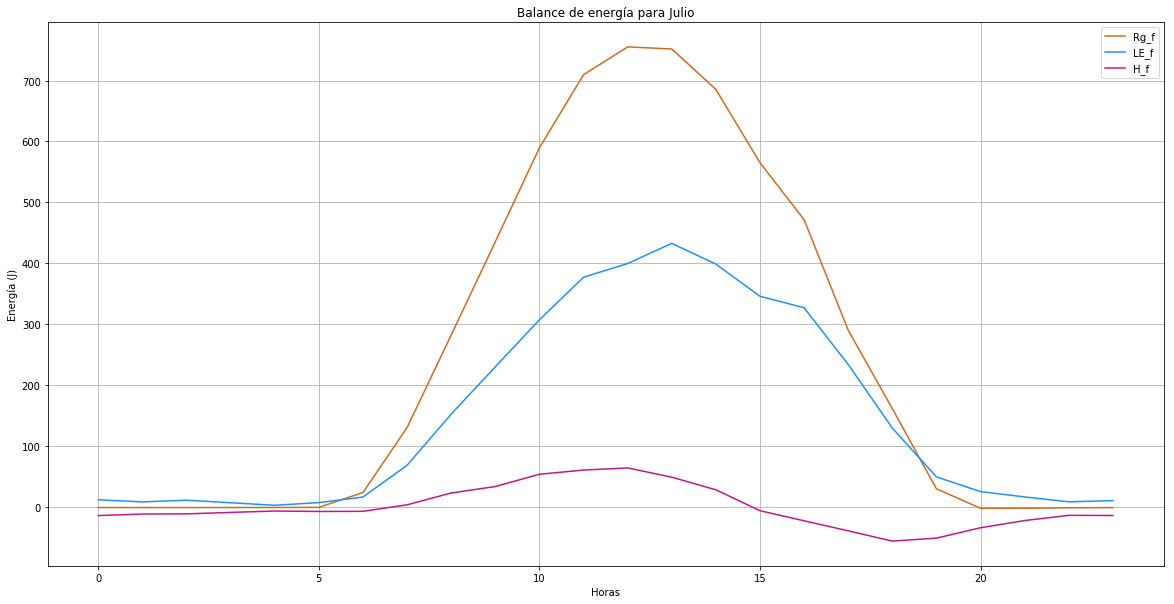

In [55]:
X = Dias
N = np.arange(24)           
Y1 = Tabla2['RG_F']       
Y2 = Tabla2['LE_F']       
Y3 = Tabla2['H_f']        

plt.figure(figsize=(20,10))
plt.plot(X, Y1, label="Rg_f", color = '#D2691E') 
plt.plot(Y2, label="LE_f", color = '#1E90FF') 
plt.plot(Y3, label="H_f", color = '#C71585')
plt.xlabel("Horas")                              
plt.ylabel("Energía (J)") 
plt.legend()                                     
plt.grid()
plt.title('Balance de energía para Julio') 
plt.savefig('balance_Julio',plt=2000)     
plt.show()